# Exploratory Data Analysis of Penguins' Morphological Characteristics


The aim of this project is to explore a dataset of penguin species, visualizing the data and performing a simple linear regression analysis. 


In [3]:
# Import necessary libraries for the EDA
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Data Cleaning

In [5]:
# Import dataset from local drive
# Dataset can be downloaded from https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data/code?resource=download
# Author of dataset is Dr. Kristen Gorman
penguin_df = pd.read_csv('/home/wells/Documents/DataScience_Portfolio/penguins_size.csv') # Directory will need to be changed for replication purposes
penguin_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
penguin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [7]:
# Determine the percentage of null values
penguin_df.isnull().sum() * 100 / penguin_df.shape[0]

species              0.000000
island               0.000000
culmen_length_mm     0.581395
culmen_depth_mm      0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  2.906977
dtype: float64

In [8]:
# Variables each determining the mean respectively
culmen_length_mean = round(penguin_df['culmen_length_mm'].mean(),1)
culmen_depth_mean = round(penguin_df['culmen_depth_mm'].mean(),1)
flipper_length_mean = round(penguin_df['flipper_length_mm'].mean(),1)
body_mass_mean = round(penguin_df['body_mass_g'].mean(),1)
# Print the values calculated above
print("Mean culmen length : ", culmen_length_mean)
print("Mean culmen depth : ", culmen_depth_mean)
print("Mean flipper length : ", flipper_length_mean)
print("Mean body mass : ", body_mass_mean)

Mean culmen length :  43.9
Mean culmen depth :  17.2
Mean flipper length :  200.9
Mean body mass :  4201.8


In [9]:
# Replace null values with mean
penguin_df['culmen_length_mm'].replace(np.nan, culmen_length_mean, inplace=True)
penguin_df['culmen_depth_mm'].replace(np.nan, culmen_depth_mean, inplace=True)
penguin_df['flipper_length_mm'].replace(np.nan, flipper_length_mean, inplace=True)
penguin_df['body_mass_g'].replace(np.nan, body_mass_mean, inplace=True)

penguin_df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [10]:
# Drop null values for sex variable
penguin_df.dropna(subset=['sex'], axis = 0, inplace=True)

penguin_df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Data Visualization & EDA

Text(0, 0.5, 'body mass')

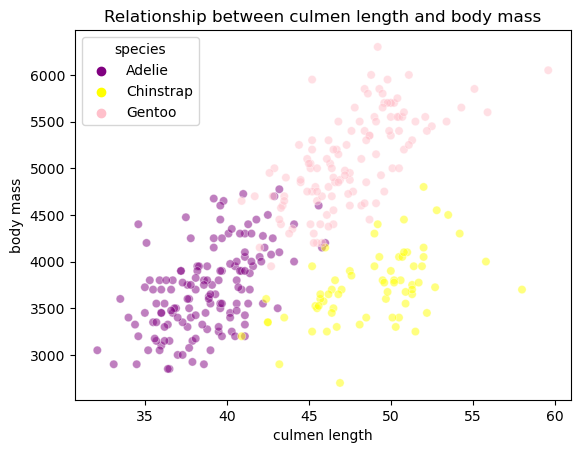

In [11]:
# Relationship betweeen culmen length and body mass
sns.scatterplot(data = penguin_df, x = 'culmen_length_mm', y = 'body_mass_g', hue = 'species', alpha = 0.5, palette = ['purple', 'yellow', 'pink'])
plt.title("Relationship between culmen length and body mass")
plt.xlabel("culmen length")
plt.ylabel("body mass")

From this, we can infer that there is not a strong relationship overall between culmen length and body mass. If we exclude the Chinstrap species, then the correlation between culmen length and body mass is much easier to see, and it is fairly strong. 

In [12]:
penguin_df[['culmen_length_mm', 'body_mass_g']].corr()

,culmen_length_mm,body_mass_g
culmen_length_mm,1.000000,0.589066
body_mass_g,0.589066,1.000000


Text(0, 0.5, 'body mass')

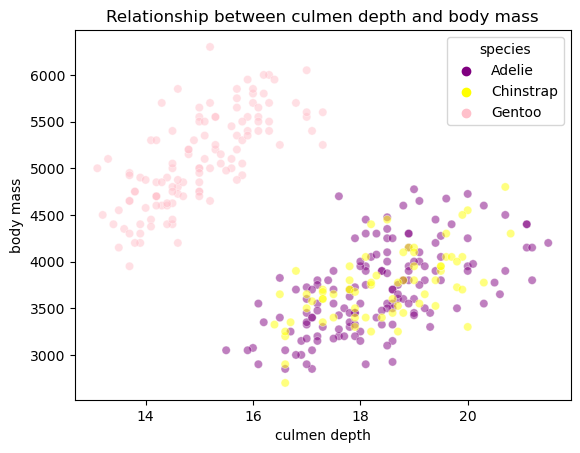

In [13]:
# Relationship betweeen culmen depth and body mass
sns.scatterplot(data = penguin_df, x = 'culmen_depth_mm', y = 'body_mass_g', hue = 'species', alpha = 0.5, palette = ['purple', 'yellow', 'pink'])
plt.title("Relationship between culmen depth and body mass")
plt.xlabel("culmen depth")
plt.ylabel("body mass")

The data presents with a negative relationship between culmen depth and body mass. Separating Gentoo from the relationship would result in a positive correlation.

In [14]:
penguin_df[['culmen_depth_mm', 'body_mass_g']].corr()

,culmen_depth_mm,body_mass_g
culmen_depth_mm,1.000000,-0.472987
body_mass_g,-0.472987,1.000000


Text(0, 0.5, 'body mass')

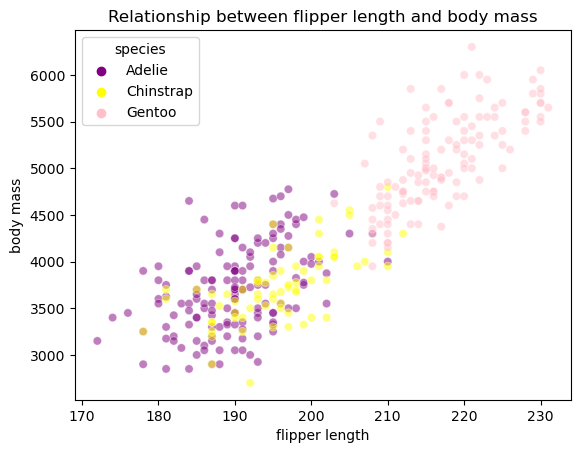

In [15]:
# Relationship betweeen flipper length and body mass
sns.scatterplot(data = penguin_df, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', alpha = 0.5, palette = ['purple', 'yellow', 'pink'])
plt.title("Relationship between flipper length and body mass")
plt.xlabel("flipper length")
plt.ylabel("body mass")

The relationship between flipper length and body mass is positive, with a fairly strong correlation. This relationship makes logical sense seeing that the length determines the penguins' swimming ability, with a potential causal relation to body mass. This relationship ought to be explored more in-depth.

In [16]:
penguin_df[['flipper_length_mm', 'body_mass_g']].corr()

,flipper_length_mm,body_mass_g
flipper_length_mm,1.000000,0.873211
body_mass_g,0.873211,1.000000


## Analysis

In [17]:
# Define x and y, selecting for flipper length and body mass variables
x = penguin_df["flipper_length_mm"].values.reshape(-1, 1)
y = penguin_df["body_mass_g"].values

In [18]:
# Fit a linear regression model to the data
reg_model = LinearRegression().fit(x, y)

In [19]:
# Compute the R-squared value of the model
y_pred = reg_model.predict(x)
r_squared = r2_score(y, y_pred)

print("Linear Regression Model R-squared value: {:.3f}".format(r_squared))

Linear Regression Model R-squared value: 0.762


Text(0, 0.5, 'body mass')

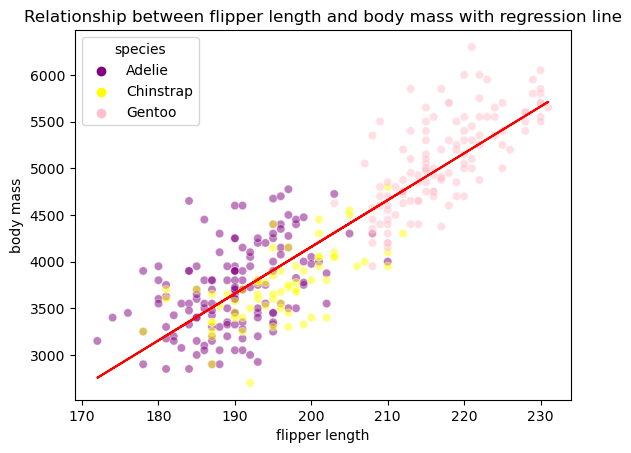

In [20]:
# Relationship betweeen flipper length and body mass with regression
sns.scatterplot(data = penguin_df, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species', alpha = 0.5, palette = ['purple', 'yellow', 'pink'])
plt.plot(x, y_pred, color="red")
plt.title("Relationship between flipper length and body mass with regression line")
plt.xlabel("flipper length")
plt.ylabel("body mass")

## Conclusion

From the analysis into the penguin dataset, we can infer there is a positive correlation and relationship between flipper length and body mass for all three species of penguins. Furthermore, the R-squared value is 0.762, which is strong.

The other relations explored presented with less potential for further analysis. Culmen length by body mass had a moderately positive correlation of 0.589066 and culmen depth a negative correlation of -0.472987.
Interestingly, the later could be explored further if the Gentoo species were removed from the analysis or analyzed separately. This has some potential.

Last, penguins are awesome.